In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df_start = pd.read_csv('Mall_Customers.csv')
df_end = pd.read_csv('Mall_Customers (1).csv')

In [3]:
df_start.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df_start['Gender'] = df_start['Gender'].map({'Male': 0, 'Female': 1})


In [5]:
c = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_start[c] = MinMaxScaler().fit_transform(df_start[c])
df_start.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,0.400962,0.373443,0.502041
std,57.879185,0.497633,0.268635,0.215285,0.263505
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,50.750000,0.000000,0.206731,0.217213,0.344388
50%,100.500000,1.000000,0.346154,0.381148,0.500000
75%,150.250000,1.000000,0.596154,0.516393,0.734694
max,200.000000,1.000000,1.000000,1.000000,1.000000


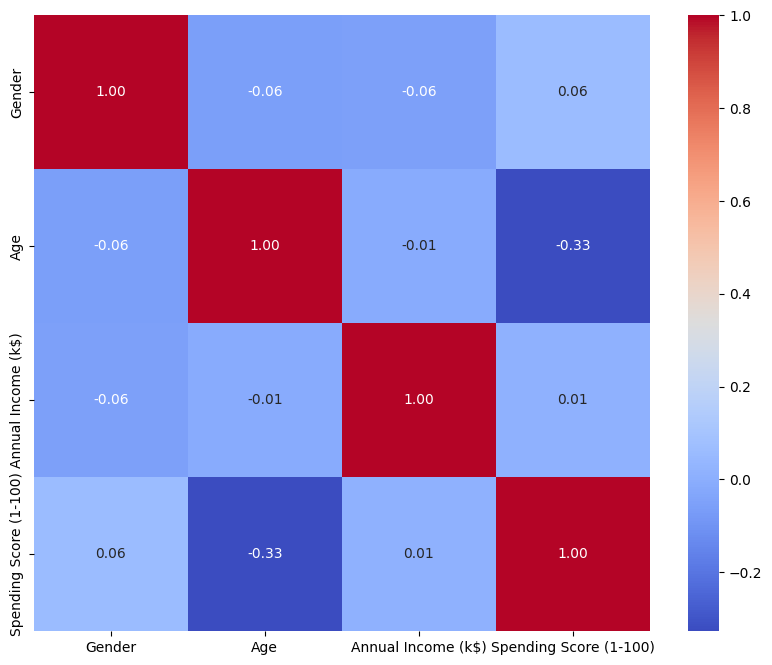

In [6]:
plt.figure(figsize=(10, 8))

correlation_matrix = df_start[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

plt.show()

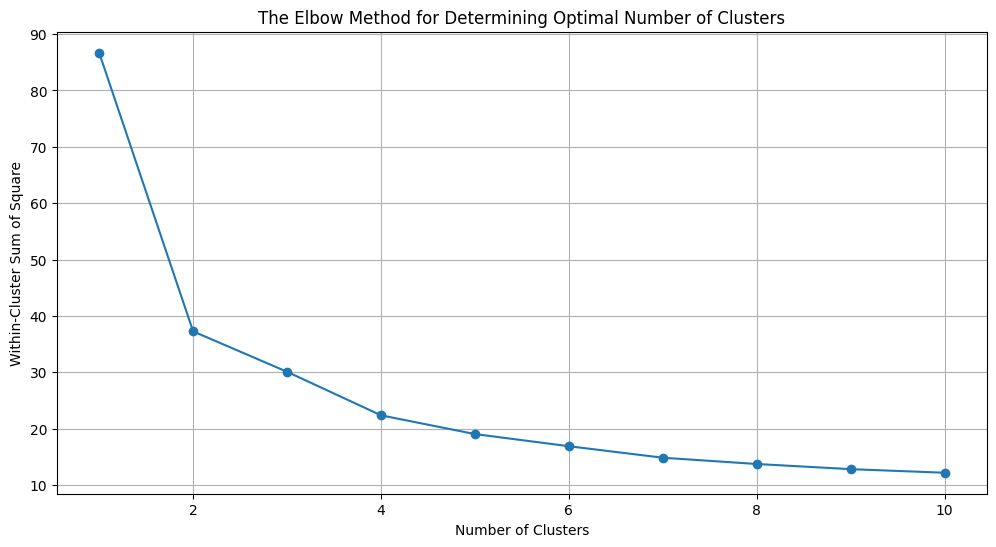

In [7]:
# Определяем диапазон количества кластеров
range_n_clusters = range(1, 11)

# Подготовка данных для кластеризации
data_to_cluster = df_start[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

wss = []

# Вычисление WSS для различного количества кластеров
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_to_cluster)
    wss.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(12,6))
plt.plot(range_n_clusters, wss, marker='o')
plt.title('The Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.grid(True)
plt.show()


Инициализация пустого списка WSS: Перед началом алгоритма создается пустой список, в который будут добавляться значения WSS для каждого количества кластеров.

Цикл по количеству кластеров: Итерируем по предполагаемому диапазону количеств кластеров. В вашем примере это не показано, но, как правило, это может быть диапазон от 1 до 10 или больше.

Кластеризация K-средних: На каждой итерации создается новый экземпляр алгоритма K-средних с указанным количеством кластеров n_clusters и фиксированным random_state для воспроизводимости результатов.

Подгонка модели: Алгоритм K-средних применяется к данным с помощью метода .fit(), где data_to_cluster — это данные, которые необходимо кластеризовать.

Добавление WSS в список: После обучения модели, значение инерции (которое является WSS) добавляется в список wss. Инерция (kmeans.inertia_) измеряет, насколько данные "близки" к их соответствующим центроидам — низкая инерция указывает на то, что кластеры хорошо разделены.

Функция KMeans: Это конструктор класса, который создает объект K-средних. В конструкторе можно задать различные параметры, такие как количество кластеров (n_clusters), метод инициализации центроидов, количество итераций и так далее. Например, KMeans(n_clusters=n_clusters, random_state=42) создает объект K-средних, где n_clusters определяет желаемое количество кластеров, а random_state обеспечивает воспроизводимость результатов путем задания зерна для генератора случайных чисел.

<h3>Инициализация медоидов</h3>

Инициализация медоидов путём случайного выбора k уникальных точек из набора данных.
    
Аргументы:
X - массив признаков набора данных.
k - количество кластеров, для которых нужно найти медоиды.
    

In [8]:
def initialize_medoids(X, k):

    np.random.seed(42)  # Для воспроизводимости результатов
    initial_medoids_indices = np.random.choice(len(X), k, replace=False)
    medoids = X[initial_medoids_indices]
    
    return medoids

X = df_start.drop('CustomerID', axis=1).to_numpy()

medoids = initialize_medoids(X, 7)
medoids


array([[0.        , 0.11538462, 0.36885246, 0.52040816],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.80769231, 0.12295082, 0.03061224],
       [0.        , 0.30769231, 0.51639344, 0.        ],
       [0.        , 0.78846154, 0.45901639, 0.10204082],
       [1.        , 0.01923077, 0.40983607, 0.5       ],
       [1.        , 0.26923077, 0.2704918 , 0.46938776]])

<h3>Функция расчёта расстояния:</h3>

a, b - два вектора между которыми нужно вычислить расстояние.

In [9]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


<h3>Функция присваивания к кластерам:</h3>

Присваивает каждую точку в X к ближайшему медоиду.    
Аргументы:
X - массив точек для кластеризации.
medoids - текущие медоиды кластеров.
    

In [10]:
def assign_to_closest_medoid(X, medoids):
    """
    Присваивает каждую точку в X к ближайшему медоиду.
    
    Аргументы:
    X - массив точек для кластеризации.
    medoids - текущие медоиды кластеров.
    
    Возвращает:
    Массив индексов кластеров, к которым присвоена каждая точка.
    """
    clusters = np.zeros(len(X))
    
    for i, point in enumerate(X):
        # Вычисляем расстояние от точки до каждого медоида
        distances = np.array([euclidean_distance(point, medoid) for medoid in medoids])
        # Находим ближайший медоид и присваиваем точку его кластеру
        clusters[i] = np.argmin(distances)
    
    return clusters

In [11]:
assigned_clusters = assign_to_closest_medoid(X, medoids)
assigned_clusters

array([0., 1., 6., 6., 6., 6., 6., 6., 2., 6., 2., 6., 6., 6., 2., 1., 6.,
       1., 2., 6., 0., 1., 6., 1., 6., 1., 6., 1., 6., 6., 2., 6., 2., 1.,
       6., 5., 6., 6., 6., 5., 6., 1., 2., 6., 6., 6., 6., 6., 6., 6., 6.,
       0., 6., 4., 6., 4., 6., 4., 6., 4., 4., 0., 6., 6., 4., 0., 6., 6.,
       0., 6., 4., 6., 6., 6., 4., 0., 6., 0., 5., 6., 4., 0., 4., 6., 5.,
       4., 6., 5., 6., 6., 6., 0., 4., 6., 6., 0., 6., 6., 4., 0., 5., 6.,
       4., 0., 0., 5., 6., 4., 4., 4., 4., 5., 6., 0., 5., 5., 6., 6., 6.,
       6., 0., 6., 6., 0., 5., 6., 3., 0., 4., 0., 4., 0., 5., 6., 3., 5.,
       6., 0., 3., 6., 6., 0., 5., 5., 3., 0., 4., 5., 6., 0., 3., 0., 6.,
       6., 6., 5., 3., 5., 3., 5., 6., 5., 3., 5., 4., 6., 3., 5., 6., 0.,
       3., 0., 3., 0., 6., 5., 4., 0., 4., 0., 6., 5., 3., 5., 6., 0., 6.,
       0., 6., 5., 5., 5., 3., 5., 6., 5., 6., 0., 3., 0.])

<h3>Обновление медоидов</h3>

In [12]:
# Функция обновления медоидов
def update_medoids(X, clusters, k):
    """
    Находит новые медоиды для каждого кластера, минимизируя сумму расстояний 
    до всех точек в кластере.

    Аргументы:
    X - массив точек для кластеризации.
    clusters - массив индексов кластеров, к которым присвоена каждая точка.
    k - количество кластеров.

    Возвращает:
    new_medoids - массив новых медоидов для каждого кластера.
    """
    new_medoids = np.zeros((k, X.shape[1]))
    
    for i in range(k):
        # Выбираем все точки, принадлежащие кластеру i
        points_in_cluster = X[clusters == i]
        
        # Если кластер не пустой, обновляем медоид
        if len(points_in_cluster) > 0:
            # Вычисляем сумму расстояний от каждой точки до всех остальных в кластере
            distance_sum = np.sum(np.sqrt(((points_in_cluster - points_in_cluster[:, np.newaxis])**2).sum(axis=2)), axis=1)
            
            # Новый медоид - точка с минимальной суммой расстояний
            new_medoids[i] = points_in_cluster[np.argmin(distance_sum)]
    
    return new_medoids

# Теперь выполним функцию обновления медоидов
# Предположим, что 'assigned_clusters' содержит индексы кластеров для каждой точки
new_medoids = update_medoids(X, assigned_clusters, 7)
new_medoids


array([[0.        , 0.26923077, 0.47540984, 0.73469388],
       [0.        , 0.13461538, 0.07377049, 0.73469388],
       [0.        , 0.80769231, 0.12295082, 0.03061224],
       [0.        , 0.34615385, 0.59016393, 0.09183673],
       [0.        , 0.78846154, 0.31967213, 0.46938776],
       [1.        , 0.23076923, 0.51639344, 0.73469388],
       [1.        , 0.53846154, 0.31967213, 0.43877551]])

In [13]:
new_assigned_clusters = assign_to_closest_medoid(X, new_medoids)

# Сравнение нового присвоения с предыдущим для проверки, изменилась ли принадлежность точек к кластерам
clusters_changed = not np.array_equal(assigned_clusters, new_assigned_clusters)
clusters_changed

True